In [55]:
import matplotlib.pyplot as plt

In [24]:
import tensorflow as tf
from tensorflow import keras
((x_train, y_train), (x_test, y_test)) = keras.datasets.fashion_mnist.load_data()
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [182]:
x_train.shape
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
print(x_train.shape)

x_test.shape
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [247]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

from tensorflow.keras import layers, models
# Config Conv Network
model = models.Sequential()
model.add(layers.Conv2D(16, 4, activation='relu',padding='valid', input_shape=(28, 28,1)))
#model.add(layers.Conv2D(16, 3, activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(32, 3, activation='relu',use_bias=True))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation='relu',use_bias=True))
#model.add(layers.MaxPooling2D((2, 2)))






In [248]:
model.summary()

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_181 (Conv2D)          (None, 25, 25, 16)        272       
_________________________________________________________________
max_pooling2d_167 (MaxPoolin (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_182 (Conv2D)          (None, 6, 6, 32)          4640      
_________________________________________________________________
max_pooling2d_168 (MaxPoolin (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_183 (Conv2D)          (None, 1, 1, 64)          18496     
Total params: 23,408
Trainable params: 23,408
Non-trainable params: 0
_________________________________________________________________


In [235]:
model.summary()

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_160 (Conv2D)          (None, 28, 28, 16)        272       
_________________________________________________________________
max_pooling2d_153 (MaxPoolin (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_161 (Conv2D)          (None, 12, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_154 (MaxPoolin (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_162 (Conv2D)          (None, 2, 2, 64)          18496     
Total params: 23,408
Trainable params: 23,408
Non-trainable params: 0
_________________________________________________________________


In [228]:
# Config Dense Nerual network
model.add(layers.Flatten())
model.add(layers.Dense(28, activation='relu',kernel_initializer='random_normal',bias_initializer='random_normal'))
model.add(layers.Dense(10,activation='softmax',kernel_initializer='random_normal',bias_initializer='random_normal'))



In [229]:
model.summary()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_155 (Conv2D)          (None, 28, 28, 16)        272       
_________________________________________________________________
max_pooling2d_149 (MaxPoolin (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 12, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_150 (MaxPoolin (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 28)                32284     
_________________________________________________________________
dense_49 (Dense)             (None, 10)              

In [230]:
# Compile the model
optimizer=keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [231]:
# Fit the model
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 36s 11ms/step - loss: 1.0700 - accuracy: 0.7333 - val_loss: 0.3729 - val_accuracy: 0.8663
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3288 - accuracy: 0.8835 - val_loss: 0.3583 - val_accuracy: 0.8725
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2865 - accuracy: 0.8962 - val_loss: 0.3458 - val_accuracy: 0.8809
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2616 - accuracy: 0.9028 - val_loss: 0.3287 - val_accuracy: 0.8793
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2473 - accuracy: 0.9092 - val_loss: 0.2926 - val_accuracy: 0.8965
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2330 - accuracy: 0.9125 - val_loss: 0.2895 - val_accuracy: 0.9009
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2157 - accuracy: 0.9210 - val_loss: 0.3074 -

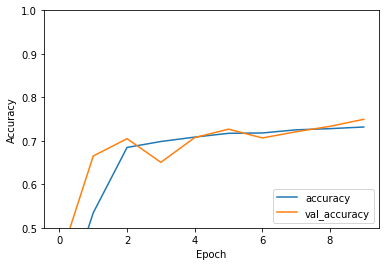

In [211]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [212]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)


313/313 - 1s - loss: 0.6648 - accuracy: 0.7495


In [107]:
print('min',(0.8995*100)-5,'/ max',(0.8995*100)+5)

min 84.95 / max 94.95


In [84]:
model.save('Conv.model',save_format='h5')